PYTHON DATA CLEANING

Karlo Pintaric

Dataset exported from my profile on the Jefit app


In [84]:
# Import libraries
import re
import datetime
import fuzzywuzzy
import numpy as np
import pandas as pd
import pytz
from fuzzywuzzy import process

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme(style="darkgrid", palette="dark")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [85]:
# Import csv file and use first row as header
df = pd.read_csv("jefit.csv", header=1)

In [86]:
# Print out the first five rows of dataframe
df.head()

,row_id,USERID,TIMESTAMP,gender,currentRoutine,DOB,name,length,mass,dbversion,...,use_location,screenon,auto_lock,lastlogs,preloadreps,exp_level,fit_goal,audio_reminder,audio_exercise_tips,audio_personal_tips
0,40172618,7317810,2022-07-04 14:29:07,M,29,1998-11-29,NaN,cm,kg,NaN,...,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,##############################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,### PROFILE ##################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,row_id,USERID,TIMESTAMP,_id,mydate,weight,fatpercent,chest,arms,waist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,44341730,7317810,2019-04-27 18:40:26,1,2019-02-11,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# Find every row that contains multiple "#" characters using regex
mask = df.row_id.str.contains(r"#+")
df[mask]

,row_id,USERID,TIMESTAMP,gender,currentRoutine,DOB,name,length,mass,dbversion,...,use_location,screenon,auto_lock,lastlogs,preloadreps,exp_level,fit_goal,audio_reminder,audio_exercise_tips,audio_personal_tips
1,##############################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,### PROFILE ##################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,##############################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,### ROUTINES #################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
751,##############################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
752,### WORKOUT SESSIONS #########################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1298,##############################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299,### EXERCISE LOGS ############################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5080,##############################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5081,### EXERCISE RECORDS #########################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# Select parts of the dataframe with sessions and exercises info
sessions = df.iloc[752:1299].reset_index(drop=True)
exercises = df.iloc[1299:5081].reset_index(drop=True)

In [89]:
# Print the first five rows
exercises.head()

,row_id,USERID,TIMESTAMP,gender,currentRoutine,DOB,name,length,mass,dbversion,...,use_location,screenon,auto_lock,lastlogs,preloadreps,exp_level,fit_goal,audio_reminder,audio_exercise_tips,audio_personal_tips
0,### EXERCISE LOGS ############################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,row_id,USERID,TIMESTAMP,belongSys,logs,_id,record,mydate,eid,ename,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2405682034,7317810,2019-04-27 18:40:26,1,"15x6,15x6,15x6,15x6",1,18,2019-03-08,2,Barbell Bench Press,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2405701074,7317810,2019-04-27 18:40:26,1,"10x12,10x10,10x8",2,14,2019-03-08,165,Dumbbell Incline Fly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2405714085,7317810,2019-04-27 18:40:26,1,"10x8,6x10,6x10,6x10",3,12.66,2019-03-08,884,Dumbbell Standing Press,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# Print the last five rows
exercises.tail()

,row_id,USERID,TIMESTAMP,gender,currentRoutine,DOB,name,length,mass,dbversion,...,use_location,screenon,auto_lock,lastlogs,preloadreps,exp_level,fit_goal,audio_reminder,audio_exercise_tips,audio_personal_tips
3777,9244894351,7317810,2022-08-25 14:56:06,1,"56x10,56x10,56x10",3778,74.66,2022-08-25,199,Barbell Romanian Deadlift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3778,9245005301,7317810,2022-08-25 15:03:48,1,"8x6,8x6,8x6",3779,9.6,2022-08-25,24,Dip,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3779,9245046281,7317810,2022-08-25 15:08:29,1,"140x10,140x10,140x10",3780,186.66,2022-08-25,145,Standing Calf Raises,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3780,9245082460,7317810,2022-08-25 15:14:50,1,"9x10,9x10,9x10",3781,12,2022-08-25,100,Dumbbell Bicep Curl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3781,##############################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# Rows and columns to drop
inds = [
    0, 
    1, 
    3781
    ]

cols = [
        "row_id",
        "record",
        "USERID",
        "belongSys",
        "_id",
        "TIMESTAMP",
        "day_item_id",
        "interval_logs",
        "logTime"
    ]

In [92]:
# Function that does some quick cleaning by removing rows, columns and renaming them
def quick_clean(df, index_to_drop, cols_to_drop):
    
    # Drop all columns with no entries
    df = df.dropna(
        how="all", 
        axis=1, 
        )

    # Rename the columns
    df.columns = list(
        df.iloc[1] # Use row at index 1 for column names
        )

    # Drop rows with no values and obsulete columns
    df = df.drop(
        index=index_to_drop, 
        columns=cols_to_drop,
        )

    # Reset index
    df = df.reset_index(
        drop=True, 
        )

    return df

In [93]:
exercises = quick_clean(exercises, index_to_drop=inds, cols_to_drop=cols)

In [94]:
exercises.head()

,logs,mydate,eid,ename,belongsession
0,"15x6,15x6,15x6,15x6",2019-03-08,2,Barbell Bench Press,2
1,"10x12,10x10,10x8",2019-03-08,165,Dumbbell Incline Fly,2
2,"10x8,6x10,6x10,6x10",2019-03-08,884,Dumbbell Standing Press,2
3,"6x9,6x10,6x10,6x10",2019-03-08,32,Dumbbell Lateral Raise,2
4,"9x12,9x12,9x12,9x9",2019-03-08,250,Cable Triceps Pushdown,2


In [95]:
exercises.dtypes

logs             object
mydate           object
eid              object
ename            object
belongsession    object
dtype: object

In [96]:
# Extract info from logs and calculate statistics
def extract_from_logs(row):
            
    log = row["logs"]

    reps = [int(rep) for rep in re.findall(r"\dx([\d]{,3})", log)] # extract number of reps in each set

    weights = [float(weight) for weight in re.findall(r"([.\d]+)x", log)] # extract weight used in each set

    # Count the number of sets
    row["sets"] = len(
        log.split(",")
        )

    # Calculate the total number of reps
    row["total_reps"] = sum(reps)

    # Calculate the total weight
    row["total_weight"] = sum(weights)

    # Find the heaviest weight used
    row["max_weight"] = max(weights)

    # Estimate one-rep max
    one_RM_lst = []
    for weight, rep in zip(weights, reps):
        one_RM = weight * (1 + (rep / 30)) # Epley formula for one-rep max calculation
        one_RM_lst.append(round(one_RM, 1))
    
    row["one_RM"] = max(one_RM_lst)


    return row

In [97]:
exercises = exercises.apply(extract_from_logs, axis=1)

In [98]:
# Get a sample of 10 to check for errors
exercises.sample(10, random_state=0)

,logs,mydate,eid,ename,belongsession,sets,total_reps,total_weight,max_weight,one_RM
502,"12.5x11,12.5x7,12.5x6,12.5x6",2019-05-28,884,Dumbbell Standing Press,77,4,30,50.0,12.5,17.1
2165,"18x8,18x8,18x8",2021-03-09,31,Dumbbell Incline Bench Press,289,3,24,54.0,18.0,22.8
3662,"85x1,80x2",2022-06-10,2,Barbell Bench Press,524,2,3,165.0,85.0,87.8
1658,"16x12,16x12,16x12",2020-07-16,90,Dumbbell One Arm Row,217,3,36,48.0,16.0,22.4
3335,"54.5x12,54.5x12,54.5x12",2022-02-25,161,Seated Leg Curl,471,3,36,163.5,54.5,76.3
1912,"2.5x20,2.5x20,2.5x20",2020-10-10,32,NaN,253,3,60,7.5,2.5,4.2
891,"60x16,50x16,40x20",2019-07-24,1310,One Leg Calf Press on Leg Press,117,3,52,150.0,60.0,92.0
3619,"105x1,100x3,100x3",2022-05-31,12,Barbell Squat,517,3,7,305.0,105.0,110.0
3071,"63.5x8,63.5x8",2021-11-29,161,Seated Leg Curl,432,2,16,127.0,63.5,80.4
2996,"8x15,8x10,7x15",2021-11-10,874,Cable Rope Face Pull,421,3,40,23.0,8.0,12.0


In [99]:
# Functions that turns a list of lists into a single list
def flat_list(lst):
    return [i for item in lst for i in item]

Problem: Exercise names are inconsistent (e.g. Pull-Up, Pull Up, Curls, Curl). Exercise ids (eid column) are not unique. User created custom exercises share ids with exercises that use the same muscle group so eid can't be used to group exercises.

Solution: Use fuzzy matching to find similar names and keep only one

In [100]:
# Function that uses fuzzy matching to find similar strings
def replace_similar_strings(df, col, max_matches=10, min_score=75):

    # Get each unique string
    string_list = list(df[col].dropna().unique())
    string_list.sort()

    # Finds the top 5 similar matches for each string
    top_matches_lst = []
    for string in string_list:

        # Skips string if already in list
        if len(top_matches_lst) > 0:
            if string in flat_list(top_matches_lst):
                continue

        # Return a list of tuples of matched strings and respective confidence score
        matches = fuzzywuzzy.process.extract(
            string, string_list, limit=max_matches, scorer=fuzzywuzzy.fuzz.token_sort_ratio
        )

        # Use only matches with a certain score
        top_matches = [match[0] for match in matches if match[1] >= min_score]

        # Add to main list if adequate matches were found
        if len(top_matches) > 1:
            top_matches_lst.append(top_matches)

    return top_matches_lst

In [101]:
top_matches_lst = replace_similar_strings(exercises, "ename", max_matches=5, min_score=90)
top_matches_lst

[["2'' Block Pull",
  "3'' Block Pull",
  "4'' Block Pull",
  "5'' Block Pull",
  "6'' Block Pull"],
 ['Barbell Bent Over Row', 'Barbell Bent-Over Row'],
 ['Cable Rope Overhead Tricep Extension',
  'Cable Rope Overhead Triceps Extension'],
 ['Cable V Bar Pull Down', 'Cable V Bar Pull-down'],
 ['Chin Up', 'Chin-Up'],
 ['Deep Push Up', 'Deep Push-Up'],
 ['Dumbbell Alternate Bicep Curl', 'Dumbbell Alternating Bicep Curl'],
 ['Dumbbell Bent Over Row', 'Dumbbell Bent-Over Row'],
 ['Dumbbell Concentration Curl', 'Dumbbell Concentration Curls'],
 ['Dumbbell Hammer Curl', 'Dumbbell Hammer Curls'],
 ['Dumbbell Lying Supine Two Arm Triceps Extension',
  'Dumbbell Supine Two-Arm Triceps Extension'],
 ['Dumbbell One Arm Row', 'Dumbbell One-Arm Row'],
 ['Dumbbell One Arm Triceps Extension', 'Dumbbell One-Arm Tricep Extension'],
 ['EZ Bar Tricep Extension', 'EZ Bar Triceps Extension'],
 ['Hammer Grip Pull Up', 'Hammer Grip Pull-Up'],
 ['Jackknife Sit up', 'Jackknife Sit-Up'],
 ['Leg Extension', 'Leg

In [102]:
# For similar strings keep only the last one
for duplicates in top_matches_lst:
    mask = exercises["ename"].isin(duplicates)
    exercises.loc[mask, "ename"] = duplicates[-1]

In [103]:
exercises.ename.sort_values().unique()

array(["6'' Block Pull", 'Ab Crunch Machine', 'Air Bike', 'Arm Circles',
       'Back Hyperextension', 'Barbell Bench Press',
       'Barbell Bench Squat ', 'Barbell Bent One Arm Row',
       'Barbell Bent-Over Row', 'Barbell Close Grip Bench Press',
       'Barbell Deadlift', 'Barbell Front Squat', 'Barbell Hip Thrust',
       'Barbell Military Press', 'Barbell One-Arm Row',
       'Barbell Preacher Curl', 'Barbell Rack Pulls',
       'Barbell Romanian Deadlift', 'Barbell Single Leg Squat',
       'Barbell Squat', 'Barbell Squat To A Bench',
       'Barbell Standing Military Press', 'Bench Press Machine',
       'Cable Biceps Curl', 'Cable Cross Over', 'Cable Crunch',
       'Cable Lateral Raise', 'Cable Lower Chest Raise',
       'Cable One Arm Lateral Raise',
       'Cable One Arm Standing Overhead Tricep Extension',
       'Cable One Arm Tricep Extension', 'Cable One-Arm Lat Pulldown',
       'Cable Pull Through', 'Cable Reverse Crunch',
       'Cable Reverse Wood Chops', 'Cable Ro

In [104]:
# Fix exercise names that fuzzy matching didn't find
exercises["ename"].replace({
    "6'' Block Pull": "Block Pull", 
    "Barbell Standing Military Press": "Barbell Military Press",
    "Smith Machine Single Leg Split Squat": "Bulgarian Split Squat"}, 
    inplace=True
    )

In [105]:
# Check for missing values
exercises.isnull().sum()

logs               0
mydate             0
eid                0
ename            135
belongsession      0
sets               0
total_reps         0
total_weight       0
max_weight         0
one_RM             0
dtype: int64

PROBLEM: App din't record exercise names for a certain period.

SOLUTION: Use exercise ids to fill the missing names. Use only the name of the first instance with that id because custom exercises that were later created use the same ids.

In [106]:
# Function that uses exercise ids to replace missing values
def fillna_with_eid(row):

    if row["ename"] is np.nan:
        eid = row["eid"]
        ename = exercises.loc[exercises["eid"] == eid, "ename"].dropna().iloc[0] # get the name of the first exercise with that id

        row["ename"] = ename

    return row

In [107]:
exercises = exercises.apply(fillna_with_eid, axis=1)

In [108]:
exercises.isnull().sum()

logs             0
mydate           0
eid              0
ename            0
belongsession    0
sets             0
total_reps       0
total_weight     0
max_weight       0
one_RM           0
dtype: int64

In [109]:
# Find exercises with zero weight
exercises.query(
    "total_weight==0").sample(10, random_state=0)

,logs,mydate,eid,ename,belongsession,sets,total_reps,total_weight,max_weight,one_RM
489,"0x0,0x0,0x0,0x0,0x180",2019-05-22,312,Indoor Cycling,75,5,180,0.0,0.0,0.0
119,"0x0,0x0,0x0,0x0,0x300",2019-03-24,310,Elliptical Training,20,5,300,0.0,0.0,0.0
117,"0x16,0x16,0x15",2019-03-23,1273,Parallel Bar Leg Raise,19,3,47,0.0,0.0,0.0
3194,"0x0,0x0,0x0,0x5,0x10,0x0,0x0,0x0,0x5,0x20,0x0,...",2022-01-13,21,L-Sit Hold,450,15,70,0.0,0.0,0.0
30,"0x15,0x15,0x15",2019-03-10,1273,Parallel Bar Leg Raise,6,3,45,0.0,0.0,0.0
488,"0x0.0,0x0.0,0x6.16,0x30.6,0x600",2019-05-21,312,Indoor Cycling,74,5,636,0.0,0.0,0.0
2081,"0x0,0x0,0x0,0x5,0x30,0x0,0x0,0x0,0x5,0x30,0x0,...",2020-11-26,631,Plank,276,15,105,0.0,0.0,0.0
611,"0x0,0x0,0x0,0x0,0x150",2019-06-13,310,Elliptical Training,88,5,150,0.0,0.0,0.0
258,"0x0,0x0,0x0,0x5,0x90,0x0,0x0,0x0,0x5,0x85",2019-04-13,2,Flat Bench Dumbbell Hold,43,10,185,0.0,0.0,0.0
54,"0x0,0x0,0x0,0x0,0x300",2019-03-14,310,Elliptical Training,10,5,300,0.0,0.0,0.0


PROBLEM: Bodyweight and timed exercises have different logging formats.

SOLUTION: Set weight for bodyweight exercises to 1. Keep only duration for timed exercises and set the weight to 0.

In [110]:
# Get all timed exercises
mask = (exercises.total_weight == 0) & (exercises.ename != 'Parallel Bar Leg Raise')

# Fix logs of timed exercises
exercises.loc[mask, "logs"] = exercises.loc[mask, "logs"].replace(
    r"0x[0\.]+,|0x[5]{1},", 
    "", 
    regex=True
    )

In [111]:
# Get all instances where no weight was entered for "Parallel Bar Leg Raise"
mask = (exercises.total_weight == 0) & (exercises.ename == "Parallel Bar Leg Raise")

# Set weight to one 
exercises.loc[mask, "logs"] = exercises.loc[mask, "logs"].replace(
    r"(0)(?=x\d+)", 
    "1", 
    regex=True
    )

In [112]:
# Extract info from fixed logs
mask = exercises.total_weight == 0

exercises.loc[mask] = exercises.loc[mask].apply(extract_from_logs, axis=1)

In [113]:
# Convert "mydate" column to datetime64
exercises["mydate"] = pd.to_datetime(exercises["mydate"])

In [114]:
# Function that corrects wrong data entry for exercises
def fix_weight(match, how=None):

    if how=="double_weight": 
        fixed = float(match[0])*2 # Double the weightt
    
    if how=="add_barbell":  
        fixed = float(match[0])*2+20 # Double the weight and add barbell weight
    
    if how=="convert_from_lbs":    
        fixed = float(match[0])/ 2.2 # Convert from pounds to kilos

    if how=="remove_barbell":    
        fixed = float(match[0]) - 20 # Remove barbell weight
            
    
    if fixed.is_integer(): # Remove decimal if number is whole
        return f"{int(fixed)}"   
    else:
        return f"{fixed}"

PROBLEM: Exercises from earlier sessions have inconsistent entries for weight used (e.g. no barbell weight added) because I was new to the gym.

SOLUTION: Find wrong data entries using a clustering technique. Use common sense to determine the correct way to fix the entry. Use the one rep max column because it takes reps and weight into account.

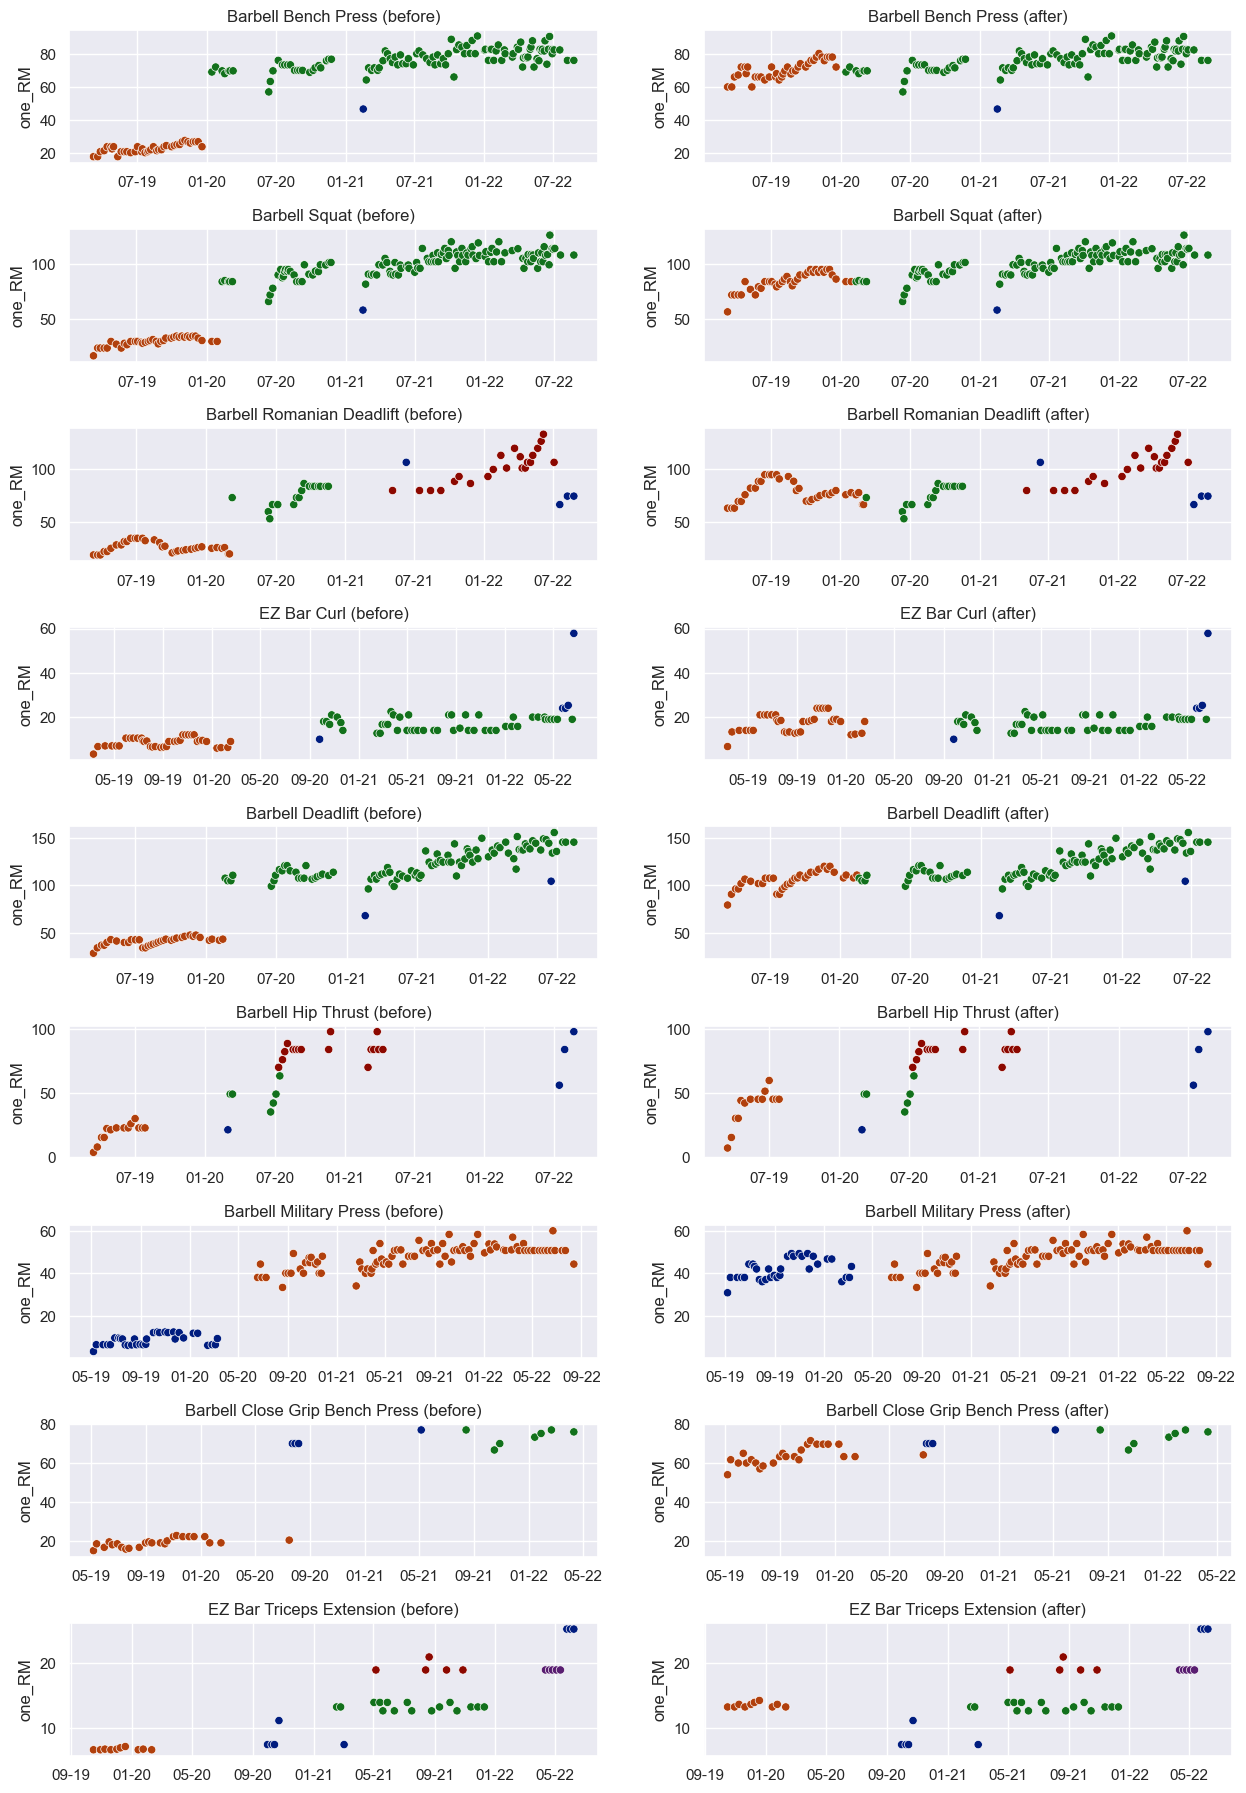

In [115]:
# Get the names of all exercises with bars
mask = exercises.ename.str.contains("Barbell|EZ")
ex_lst = exercises.loc[mask].ename.unique()


# Create a figure and adjust figure size and spacing
plt.figure(figsize=(15, 25))
plt.subplots_adjust(hspace=0.5)
i=0
nrows = int(round(len(ex_lst)/2, 0))

# Loop through each exercise with bars
for ex in ex_lst:
        
        data = exercises.loc[
                exercises.ename==ex, 
                ["mydate", "one_RM"]
                ]
        
        data = data.reset_index()

        # Skip if small number of entries for exercise
        if data.shape[0] < 30: 
                continue

        i+=1
        X = data.copy()
        
        # Convert dates back to unix time
        X["mydate"] = X["mydate"].map( 
                lambda x: x.value / 10e9
                ) 
        
        # Scale values
        scaler = StandardScaler()
        X_scaled = pd.DataFrame(
                scaler.fit_transform(X), 
                columns=X.columns
                ) 

        # Use DBSCAN with default parameters for clustering 
        dbscan = DBSCAN(eps=0.5, n_jobs=-1).fit(X_scaled) 
        clusters = dbscan.labels_ # get cluster labels

        # Add cluster labels to dataframe copy
        data = pd.concat([data, 
                pd.Series(clusters, name="label")], 
                axis=1
                )
        data = data.set_index("index")
    
        # Create a grid of plots
        ax1 = plt.subplot(nrows, 2, 2*i-1)
        
        # Create a scatterplot with labeled clusters
        sns.scatterplot(
                ax=ax1, 
                data=data, 
                x="mydate", 
                y="one_RM", 
                hue="label", 
                legend=False, 
                palette="dark"
                ).set(
                        title=f"{ex} (before)", 
                        xlabel=None
                        )


        # Set x ticks to display as short year and month
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))

        
        # Select all entries from original dataframe with specified exercise name and cluster label of 0
        mask = (exercises.ename==ex) & (data.label==0)
        
        # Use different calculation if EZ bar or hip thrust
        if "EZ" in ex or "Hip" in ex:
                exercises.loc[mask, "logs"] = exercises.loc[
                        mask, "logs"
                        ].map(
                        lambda x: re.sub(r"([0-9.]+)(?=x\d+)", 
                                lambda match: fix_weight(
                                        match, 
                                        how="double_weight"
                                                ), x)
                                )
        
        else:
                exercises.loc[mask, "logs"] = exercises.loc[
                        mask, "logs"
                        ].map(
                        lambda x: re.sub(r"([0-9.]+)(?=x\d+)", 
                                lambda match: fix_weight(
                                        match, 
                                        how="add_barbell"
                                                ), x)
                                )

        # Extract info from fixed logs
        exercises.loc[mask] = exercises.loc[mask].apply(
                extract_from_logs, 
                axis=1
                )

        
        # Create second plot in the same row
        ax2 = plt.subplot(nrows, 2, 2*i, 
                sharey=ax1, sharex=ax1
                )

        # Create a scatterplot with cluster labels for fixed entries
        sns.scatterplot(
                ax=ax2, 
                x=exercises["mydate"], 
                y=exercises["one_RM"], 
                hue=data["label"], 
                legend=False, 
                palette="dark"
                ).set(
                        title=f"{ex} (after)", 
                        xlabel=None
                        )
        

In [116]:
# Function that maps exercises a category
def exercise_type(row):

    ename = row["ename"].lower()
    max_weight = row["max_weight"]

    # Dictionary for category mapping
    mapping = {
        "cardio": [ 
            "elliptical", 
            "cycling"
            ],
        "calves": [  # Isolation exercises have higher priority
            "calf"
            ],
        "hamstrings": [
            "leg curl", 
            "romanian"
            ],
        "biceps": [
            "bar curl",
            "bicep",
            "hammer curl",
            "bayesian",
            "preacher",
            "incline curl",
            "concentration",
            "zottman",
        ],
        "triceps": [
            "tricep", 
            "dip"
            ],
        "shoulder": [
            "shoulder",
            "military",
            "lateral raise",
            "standing press",
            "arnold",
            "shrug",
            "circles"
        ],
        "abdominals": [
            "crunch",
            "leg raise",
            "hanging",
            "russian",
            "flutter kick",
            "side bend",
            "wood",
            "bike",
            "sit",
            "plank",
            "l-sit",
            "isometric"
        ],
        "glutes": [
            "hip", 
            "abduct", 
            "lunge", 
            "pull through"
            ],
        "chest": [
            "bench press",
            "chest",
            "incline fly",
            "machine fly",
            "floor press",
            "push",
            "dumbbell fly",
            "cross",
            "larsen",
        ],
        "quads": [
            "squat", 
            "leg press", 
            "leg curl", 
            "leg", 
            "deadlift"
            ],
        "back": [
            "face pull",
            "lat",
            "row",
            "pull",
            "chin",
            "reverse fly",
            "back",
        ],
    }

    # Iterates through dictionary keys in order and terminates if any match is found
    for key, values in mapping.items():
        if any([v in ename for v in values]):
            row["category"] = key
            break

    return row

In [117]:
exercises = exercises.apply(exercise_type, axis=1)

In [118]:
# Get the order of exercises
exercises["order"] = exercises.groupby("mydate")["ename"].transform(
    lambda x: range(1, x.size + 1)
)

In [119]:
exercises.head()

,logs,mydate,eid,ename,belongsession,sets,total_reps,total_weight,max_weight,one_RM,category,order
0,"50x6,50x6,50x6,50x6",2019-03-08,2,Barbell Bench Press,2,4,24,200.0,50.0,60.0,chest,1
1,"10x12,10x10,10x8",2019-03-08,165,Dumbbell Incline Fly,2,3,30,30.0,10.0,14.0,chest,2
2,"10x8,6x10,6x10,6x10",2019-03-08,884,Dumbbell Standing Press,2,4,38,28.0,10.0,12.7,shoulder,3
3,"6x9,6x10,6x10,6x10",2019-03-08,32,Dumbbell Lateral Raise,2,4,39,24.0,6.0,8.0,shoulder,4
4,"9x12,9x12,9x12,9x9",2019-03-08,250,Cable Triceps Pushdown,2,4,45,36.0,9.0,12.6,triceps,5


PROBLEM: Some weight entries have typos (e.g. 52, instead of 25).

SOLUTION: Use a robust statistical method which uses medians to find extreme outliers because data isn't normally distributed and has high variability. This variability is due to the fact that machines from different gyms were used which are not set up the same. Take deload periods into account (weight used in that period is much lighter).

In [120]:
# Calculate a modified z score for the one_RM column
temp_df = pd.DataFrame()
temp_df["median"] = exercises.groupby("ename")["one_RM"].transform("median")
temp_df["mad"] = exercises.groupby("ename")["one_RM"].transform("mad") # mean absolute deviation is a robust measure of variability
temp_df["mod_zscore"] = abs((exercises["one_RM"] - temp_df["median"]) / temp_df["mad"]) * 0.6745 # https://www.statology.org/modified-z-score/

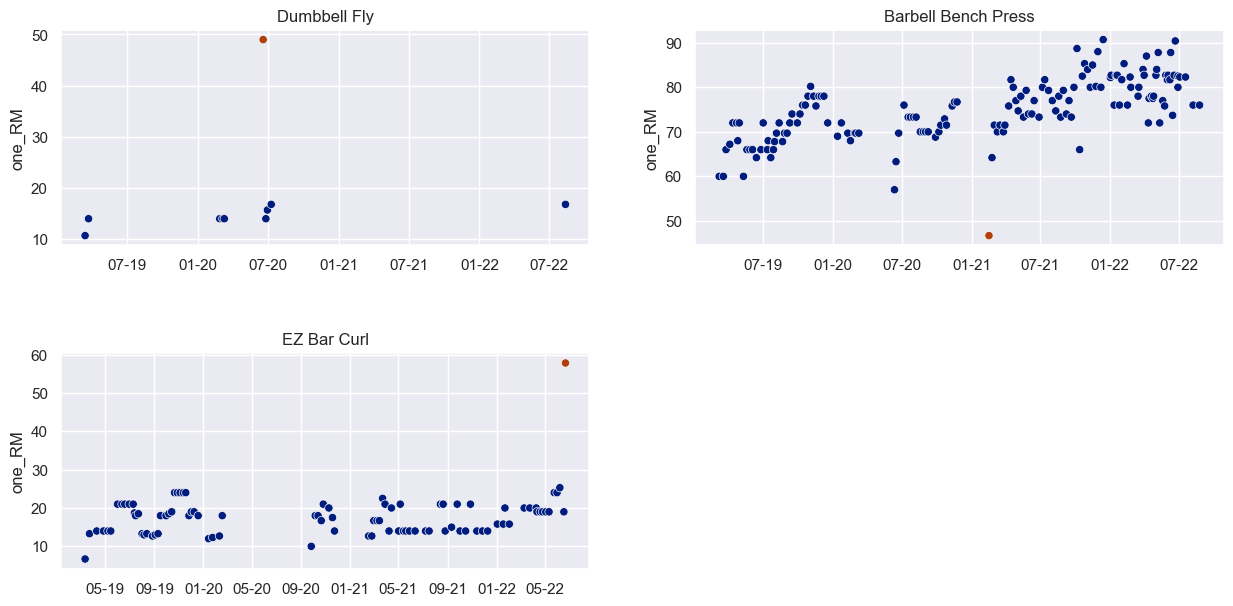

In [121]:
# Detect anomalies in the one rep max for each exercise using the modified z score
ex_lst = list(exercises[temp_df.mod_zscore>3.5].ename.unique())
nrows = int(round(len(ex_lst)/2, 0))

plt.figure(figsize=(15,7))
plt.subplots_adjust(hspace=0.5)

for i,ex in enumerate(ex_lst):
    
    data = exercises.loc[exercises.ename==ex]

    ax = plt.subplot(nrows, 2, i+1)
    
    sns.scatterplot(
                ax=ax, 
                data=data, 
                x="mydate", 
                y="one_RM",
                hue=temp_df.mod_zscore>3.5, 
                legend=False, 
                palette="dark"
                ).set(
                        title=ex, 
                        xlabel=None
                        )
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))

In [122]:
# Select the outliers
mask = ((exercises.ename=="Dumbbell Fly") | (exercises.ename=="EZ Bar Curl")) & (temp_df.mod_zscore>3.5)
exercises.loc[mask]

,logs,mydate,eid,ename,belongsession,sets,total_reps,total_weight,max_weight,one_RM,category,order
1584,"35x12,35x12,35x12",2020-06-18,41,Dumbbell Fly,206,3,36,105.0,35.0,49.0,chest,5
3683,52.5x3,2022-06-22,95,EZ Bar Curl,529,1,3,52.5,52.5,57.8,biceps,2


In [123]:
# Fix wrong data entry using common sense
exercises.loc[1584, "logs"] = "10x12,10x12,10x12"
exercises.loc[3683, "logs"] = "22.5x3"

exercises.loc[[1584,3683]] = exercises.loc[[1584,3683]].apply(extract_from_logs, axis=1)

In [124]:
sessions.head()

,row_id,USERID,TIMESTAMP,gender,currentRoutine,DOB,name,length,mass,dbversion,...,use_location,screenon,auto_lock,lastlogs,preloadreps,exp_level,fit_goal,audio_reminder,audio_exercise_tips,audio_personal_tips
0,### WORKOUT SESSIONS #########################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rowid,_id,USERID,edit_time,day_id,total_time,workout_time,rest_time,wasted_time,total_exercise,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,293965423,1,7317810,1550723647,0,80,0,0,80,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,299772744,2,7317810,1552096282,2,3022,1052,1026,314,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,299775940,3,7317810,1552093777,8,987,372,487,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
sessions.tail()

,row_id,USERID,TIMESTAMP,gender,currentRoutine,DOB,name,length,mass,dbversion,...,use_location,screenon,auto_lock,lastlogs,preloadreps,exp_level,fit_goal,audio_reminder,audio_exercise_tips,audio_personal_tips
542,1258600222,541,7317810,1659970932,0,3086,901,2118,0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
543,1264328472,542,7317810,1660406872,0,3510,1049,1947,0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
544,1274885581,543,7317810,1661276896,0,2709,480,1580,289,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545,1277245795,544,7317810,1661440491,107,3500,882,2182,0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,##############################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
cols = [
    "rowid", 
    "USERID", 
    "TIMESTAMP", 
    "edit_time", 
    "day_id", 
    "workout_mode",
    "total_weight",
    "recordbreak",
    "endtime",
] 

inds = [
    0,
    1,
    546
]

In [127]:
sessions = quick_clean(sessions, index_to_drop=inds, cols_to_drop=cols)

In [128]:
sessions.head()

,_id,total_time,workout_time,rest_time,wasted_time,total_exercise,starttime
0,1,80,0,0,80,0,1550698365
1,2,3022,1052,1026,314,7,1552060857
2,3,987,372,487,0,3,1552063987
3,4,3749,1169,1920,0,12,1552145361
4,5,3728,1378,1357,363,8,1552239275


In [129]:
# Keep only sessions listed in the previous dataset
ids = pd.Series(exercises["belongsession"].unique(), name="_id")
sessions = sessions.merge(ids, on="_id", how="inner")
sessions.head()

,_id,total_time,workout_time,rest_time,wasted_time,total_exercise,starttime
0,2,3022,1052,1026,314,7,1552060857
1,3,987,372,487,0,3,1552063987
2,4,3749,1169,1920,0,12,1552145361
3,5,3728,1378,1357,363,8,1552239275
4,6,3296,519,566,1941,3,1552243090


In [130]:
# Display datatypes of columns
sessions.dtypes

_id               object
total_time        object
workout_time      object
rest_time         object
wasted_time       object
total_exercise    object
starttime         object
dtype: object

In [131]:
# Convert from unix time to %Y-%m-%d format
sessions["starttime"] = pd.to_datetime(
    sessions["starttime"], 
    unit="s", # number of seconds sice 1970-1-1
    utc=True) # return timezone for easier conversion later

In [132]:
# Get current timezone using "pytz" module
cro_tz = pytz.timezone('Europe/Zagreb')

# Convert from UTC to my local timezone
sessions["starttime"] = sessions["starttime"].map(
    lambda x: x.astimezone(cro_tz))

In [133]:
# Convert total exercise time to minutes
for col in ["total_time", "wasted_time", "workout_time", "rest_time"]:
    sessions[col] = sessions[col].astype(int) / 60

In [134]:
# Add wasted time to workout time 
sessions["workout_time"] = sessions["workout_time"] + sessions["wasted_time"]
sessions = sessions.drop(columns=["wasted_time"])

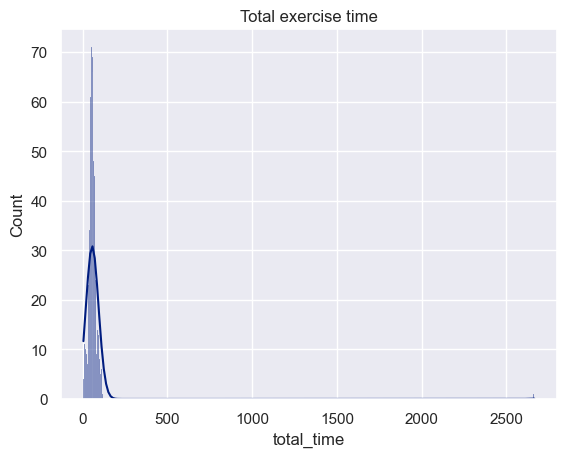

In [135]:
# Display distribution of total exercise time
sns.histplot(
    sessions["total_time"], 
    kde=True,
    ).set(title="Total exercise time");

In [136]:
# Find outliers
inds = sessions.query(
    "total_time>120 | total_time<5"
    ).index

sessions.iloc[inds]

,_id,total_time,workout_time,rest_time,total_exercise,starttime
62,66,2664.333333,2660.816667,2.016667,1,2019-05-09 20:19:03+02:00


In [137]:
# Find the mean workout time of all sessions 
df_temp = sessions.loc[~sessions.index.isin(inds)]
mean = (df_temp["workout_time"] / df_temp["total_exercise"].astype(int)).mean()

# Use mean workout time to fix outliers
sessions.loc[inds, "workout_time"] = mean
sessions.loc[inds, "total_time"] = sessions.loc[inds, "workout_time"] + sessions.loc[inds, "rest_time"] 

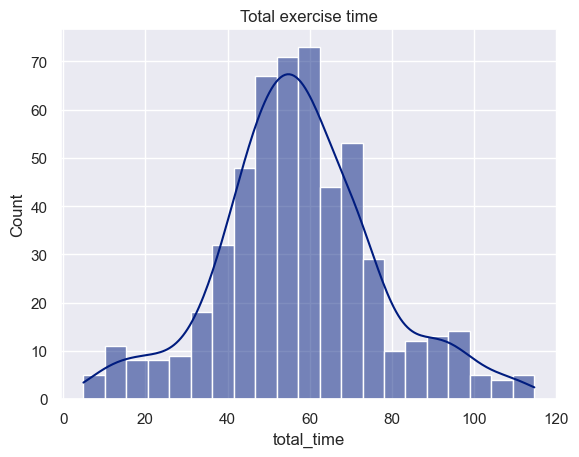

In [138]:
sns.histplot(
    sessions["total_time"], 
    kde=True,
    ).set(title="Total exercise time");

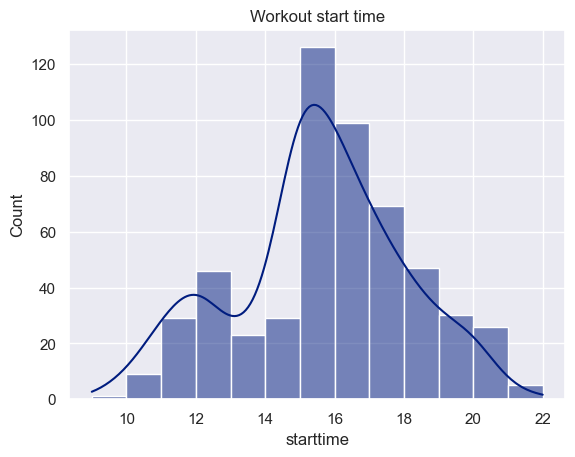

In [139]:
sns.histplot(
    sessions["starttime"].dt.hour, 
    binwidth=1, 
    kde=True
    ).set(title="Workout start time");

PROBLEM: Some days have multiple sessions (either the app crashed or I ended the sessions accidentaly).

SOLUTION: Combine all sessions with the same date to one

In [140]:
# Group all sessions by date
sessions = sessions.groupby(
    sessions.starttime.dt.date
    ).agg(
        time=("starttime", lambda x: x.iloc[0].time()), 
        total_time=("total_time", np.sum),
        workout_time=("workout_time", np.sum),
        rest_time=("rest_time", np.sum)
        ).reset_index(
        ).rename(columns={"starttime": "date"})

In [141]:
# Calculate total number of exerciss per sessions
sessions["total_exercise"] = exercises.groupby("mydate").ename.count().reset_index(drop=True)

In [142]:
sessions

,date,time,total_time,workout_time,rest_time,total_exercise
0,2019-03-08,17:00:57,66.816667,28.966667,25.216667,9
1,2019-03-09,16:29:21,62.483333,19.483333,32.000000,12
2,2019-03-10,18:34:35,117.066667,70.016667,32.050000,11
3,2019-03-12,18:09:51,103.350000,54.350000,26.500000,15
4,2019-03-13,21:14:38,52.016667,21.800000,19.716667,7
...,...,...,...,...,...,...
507,2022-07-30,16:36:36,57.416667,16.466667,30.450000,7
508,2022-08-08,16:10:42,51.433333,15.016667,35.300000,7
509,2022-08-13,15:09:19,58.500000,17.483333,32.450000,7
510,2022-08-23,17:03:04,45.150000,12.816667,26.333333,4


In [143]:
# Export data to csv
exercises.to_csv("exercises_cleaned.csv")
sessions.to_csv("sessions_cleaned.csv")